# IHLT - LABORATORY 4
Armando Rodriguez Ramos and Yara Yousef

## Import the necessary packages

In [ ]:
!pip install python-crfsuite

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 965 kB 37.9 MB/s 


In [ ]:
import nltk
import dill
import time
import matplotlib.pyplot as plt
nltk.download('treebank')

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


True

## Train and test models

We train the models with training sets of six different sizes, running from 500 to 3000 in steps of 500. For each of these training set sizes, we compute the accuracy of each model and the training time.

Note that we are using accuracy function instead of evaluate one, which is deprecated.

In [ ]:
%%time

resultsHMM, timesHMM = [], []
resultsTnT, timesTnT = [], []
resultsPER, timesPER = [], []
resultsCRF, timesCRF = [], []
test_data = nltk.corpus.treebank.tagged_sents()[3000:]

testingValues = list(range(500,3001,500))
for value in testingValues:
  print("Iteration with data =",value)

  train_data = nltk.corpus.treebank.tagged_sents()[:value]

  print("\tHMM training...",end=" ")
  start = time.time()
  trainer = nltk.tag.hmm.HiddenMarkovModelTrainer()
  HMM = trainer.train_supervised(train_data)
  elapsedTime = time.time()-start
  resultsHMM.append(round(HMM.accuracy(test_data), 3))
  timesHMM.append(round(elapsedTime,3))
  print("Done in",round(elapsedTime,3),"seconds")
  
  print("\tTnt training...",end=" ")
  start = time.time()
  TnT = nltk.tag.tnt.TnT()
  TnT.train(train_data)
  elapsedTime = time.time()-start
  resultsTnT.append(round(TnT.accuracy(test_data), 3))
  timesTnT.append(round(elapsedTime,3))
  print("Done in",round(elapsedTime,3),"seconds")

  print("\tPER training...",end=" ")
  start = time.time()
  PER = nltk.tag.perceptron.PerceptronTagger(load=False)
  PER.train(train_data)
  elapsedTime = time.time()-start
  resultsPER.append(round(PER.accuracy(test_data), 3))
  timesPER.append(round(elapsedTime,3))
  print("Done in",round(elapsedTime,3),"seconds")

  print("\tCRF training...",end=" ")
  start = time.time()
  CRF = nltk.tag.CRFTagger()
  CRF.train(train_data,'crf_tagger_model')
  elapsedTime = time.time()-start
  resultsCRF.append(round(CRF.accuracy(test_data), 3))
  timesCRF.append(round(elapsedTime,3))
  print("Done in",round(elapsedTime,3),"seconds")

  print()

Iteration with data = 500
	HMM training... Done in 0.147 seconds
	Tnt training... Done in 0.623 seconds
	PER training... Done in 3.089 seconds
	CRF training... Done in 2.889 seconds

Iteration with data = 1000
	HMM training... Done in 0.272 seconds
	Tnt training... Done in 0.353 seconds
	PER training... Done in 5.265 seconds
	CRF training... Done in 7.134 seconds

Iteration with data = 1500
	HMM training... Done in 0.409 seconds
	Tnt training... Done in 0.825 seconds
	PER training... Done in 7.229 seconds
	CRF training... Done in 10.45 seconds

Iteration with data = 2000
	HMM training... Done in 0.534 seconds
	Tnt training... Done in 0.732 seconds
	PER training... Done in 9.681 seconds
	CRF training... Done in 16.553 seconds

Iteration with data = 2500
	HMM training... Done in 0.686 seconds
	Tnt training... Done in 1.137 seconds
	PER training... Done in 12.281 seconds
	CRF training... Done in 24.549 seconds

Iteration with data = 3000
	HMM training... Done in 1.116 seconds
	Tnt trainin

## Visualize results

### Accuracies

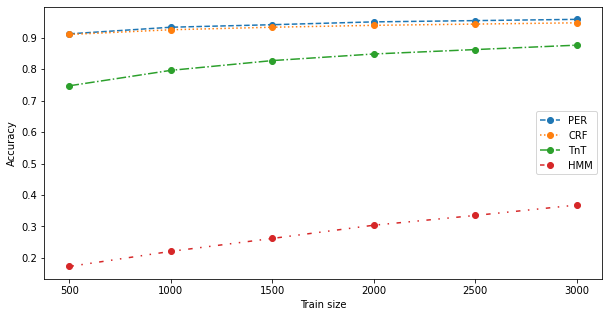

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.xlabel("Train size")
plt.ylabel("Accuracy")

plt.plot(testingValues, resultsPER, linewidth=1.5, linestyle='dashed', marker='o')
plt.plot(testingValues, resultsCRF, linewidth=1.5, linestyle='dotted', marker='o')
plt.plot(testingValues, resultsTnT, linewidth=1.5, linestyle='dashdot', marker='o')
plt.plot(testingValues, resultsHMM, linewidth=1.5, linestyle=(0, (3, 5, 1, 5, 1, 5)), marker='o')

plt.legend(["PER","CRF","TnT","HMM"],loc="center right")
plt.show()

As prelimiary analysis, we note that HMM has the lowest overall accuracy by a significant margin. PER and CRF, which have the best performances, seem to have the same or very similar accuracies for smaller sets. However as we increase to 3000, PER begins outperforming CRF slightly.

### Training times

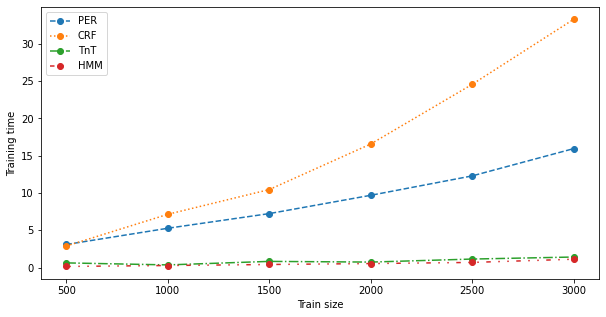

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.xlabel("Train size")
plt.ylabel("Training time")

plt.plot(testingValues, timesPER, linewidth=1.5, linestyle='dashed', marker='o')
plt.plot(testingValues, timesCRF, linewidth=1.5, linestyle='dotted', marker='o')
plt.plot(testingValues, timesTnT, linewidth=1.5, linestyle='dashdot', marker='o')
plt.plot(testingValues, timesHMM, linewidth=1.5, linestyle=(0, (3, 5, 1, 5, 1, 5)), marker='o')

plt.legend(["PER","CRF","TnT","HMM"])
plt.show()

As preliminary analysis, we see that CRF takes the longest time to train by far, increasing with set size at an obviously non-linear rate. PER's training times appear to increase closer to a linear rate (though not quite) with set size.

TnT and HMM take essentially the same training time (with HMM taking just slightly less time overall). For these models, the training time does not change significantly with the size of the training set.

## Analysis and conclusions

We find that PER and CRF have the best accuracies overall, with PER having the best performance by a small margin. HMM on the other hand, performs the worst by a very wide margin. The highest accuracies achieved for each model are listed as follows, all of which where achieved with a training set size of 3000:

> PER:  95.8%  \
> CRF:  94.7%  \
> TnT:  87.6%  \
> HMM:  36.8%

And the training time taken for the highest accuracy result of each model is also listed as follows:

>    PER:  15.936 seconds  \
    CRF:  33.264 seconds  \
    TnT:  1.41 seconds  \
    HMM:  1.116 seconds

\
When selecting the best model, we need to take into account not only accuracy but computation time as well. We need solid results, but we also need training to be as efficient as possible. While the final solution usually depends on the particular task and data set, in general the best model strikes a balance between these two.

While HMM has the shortest training times, which additionally show essentially no increase with the size of the training set, it has the lowest accuracy by far. This means that its short training times are not a particularly useful advantage.

CRF, while performing as well as PER for smaller training sets and nearly as well for larger ones, takes significantly longer to train than all the other models, taking about twice as long as PER starting from a training set size of 2000 on. While CRF's longest training time in this example is about 33 seconds, which would generally not be considered too long, this is with a very small set of only 3000 points. As such, it is not a particularly efficient model and so may not be one of the best options.

PER seems like a good choice for a model that balances both good results and efficiency, achieving the highest efficiency of all the models at 95.8% in only 16 seconds. The increase in training times also appears to be a manageable, near-linear curve, unlike the CRF curve.

Finally, we note that the TnT model also has very good balance between accuracy and efficiency. While it doesn't achieve quite as high an accuracy as PER and CRF, it still performs quite well at 87.6%. It is also much faster than PER, achieving its highest accuracy in only 1.4 seconds. So it achieves a result only 8% less accurrate at a rate over 11 times faster. Therefore, depending on the task and its requirements, TnT could be a better model than PER, for example if we have a task for which speed is more important than perfect accuracy.

#### In summary:

We resolve that PER and TnT are the models that best balance accuracy and a fast training rate. If the object is very high accuracy, then choose PER. If the object is a quick training rate (so long as the results remain adequately accurate), then choose TnT.